In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
print("I'm ready to go")

I'm ready to go


In [14]:
df = pd.read_csv("/Users/pm3796gb/Downloads/snap_data.csv")

In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-02,24.000000,26.049999,23.500000,24.480000,24.480000,217048900
1,2017-03-03,26.389999,29.440001,26.059999,27.090000,27.090000,148166400
2,2017-03-06,28.170000,28.250000,23.770000,23.770000,23.770000,72903000
3,2017-03-07,22.209999,22.500000,20.639999,21.440001,21.440001,71857800
4,2017-03-08,22.030001,23.430000,21.309999,22.809999,22.809999,49819100


# we want to forecast the close price, so let's subset the data

In [16]:
df = df[["Date","Close"]]

In [17]:
df.head()

,Date,Close
0,2017-03-02,24.480000
1,2017-03-03,27.090000
2,2017-03-06,23.770000
3,2017-03-07,21.440001
4,2017-03-08,22.809999


# Let's set the date as index and turn it to datetime


In [19]:
df['Date'] = pd.to_datetime(df["Date"])
df= df.set_index("Date")

# let's look at the data now

Text(0, 0.5, 'Stock Price')

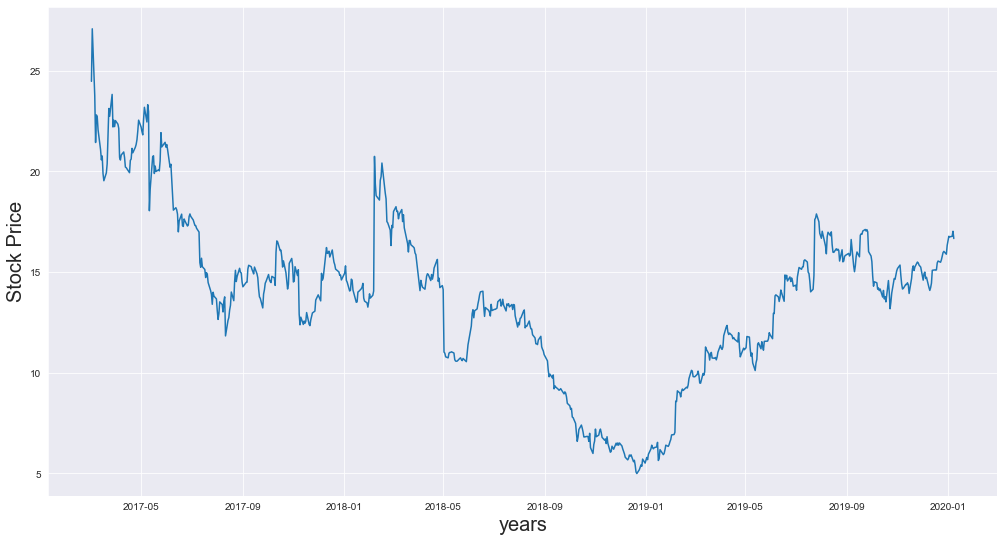

In [23]:
plt.figure(figsize=(17,9))
sea.set_style('darkgrid')
plt.plot(df)
plt.xlabel('years',fontsize = 20)
plt.ylabel('Stock Price',fontsize=20)

In [24]:
#let decompose the timeserie to see the trend 

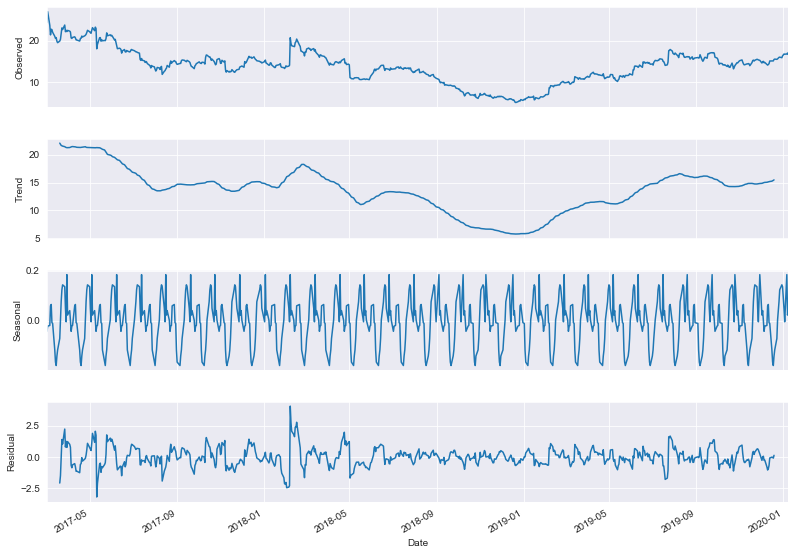

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df,freq=24)
fig = result.plot()
fig.set_size_inches(12,9)

# let's build the model now hahha

In [32]:
from pmdarima import auto_arima

In [88]:
autoarima = auto_arima(df,start_p=1, start_q=1,
                           max_p=5, max_q=5, m=24,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 24); AIC=1309.355, BIC=1332.068, Fit time=31.892 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 24); AIC=1607.211, BIC=1616.296, Fit time=0.946 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 24); AIC=1492.550, BIC=1510.720, Fit time=4.107 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 24); AIC=1311.320, BIC=1329.490, Fit time=11.873 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 24); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 24); AIC=1605.285, BIC=1609.828, Fit time=0.176 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 24); AIC=1605.849, BIC=1624.019, Fit time=1.246 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 24); AIC=1304.589, BIC=1331.844, Fit time=14.933 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 24); setting score to inf (

In [112]:
print(autoarima.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  719
Model:             SARIMAX(1, 1, 1)x(0, 1, 2, 24)   Log Likelihood                -646.050
Date:                            Thu, 09 Jan 2020   AIC                           1304.100
Time:                                    22:33:34   BIC                           1331.355
Sample:                                         0   HQIC                          1314.640
                                            - 719                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0018      0.002      1.000      0.318      -0.002       0.005
ar.L1          0.5295      0.252   

In [113]:
print(autoarima.aic())

1304.1003362063389


# let's divide our data into train and test

In [114]:
len(df)

719

# let's use 700 days to train our model and the 19 days to test

In [252]:
train = df[:680]
test= df[680:]

In [253]:
train.head()

,Close
Date,
2017-03-02,24.480000
2017-03-03,27.090000
2017-03-06,23.770000
2017-03-07,21.440001
2017-03-08,22.809999


In [254]:
test.head()

,Close
Date,
2019-11-12,14.38
2019-11-13,14.47
2019-11-14,14.37
2019-11-15,13.94
2019-11-18,14.69


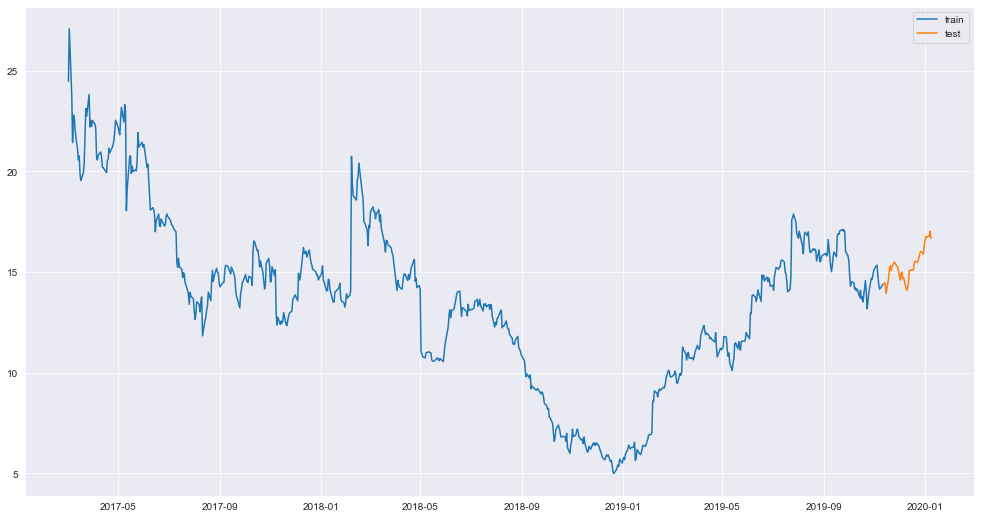

In [255]:
plt.figure(figsize=(17,9))
sea.set_style('darkgrid')
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.legend(loc='best')

In [256]:
model = autoarima.fit(train)

In [257]:
model.aic()

1262.4750850639145

In [258]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  680
Model:             SARIMAX(1, 1, 1)x(0, 1, 2, 24)   Log Likelihood                -625.238
Date:                            Sat, 11 Jan 2020   AIC                           1262.475
Time:                                    01:09:00   BIC                           1289.383
Sample:                                         0   HQIC                          1272.908
                                            - 680                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0018      0.002      0.897      0.370      -0.002       0.006
ar.L1          0.5132      0.267      1.923      0.054      -0.010       1.036
ma.L1         -0.5949      0.260     -2.292      0.022      -1.104      -0.086
ma.S.L24      -0.8679      0.300     -2.893      0.004      -1.456      -0.280
ma.S.L48      -0.1235      0.057     -2.158      0.031      -0.236      -0.011
sigma2         0.3548      0.105      3.366      0.001       0.148       0.561
===================================================================================
Ljung-Box (Q):                       31.41   Jarque-Bera (JB):             21062.84
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

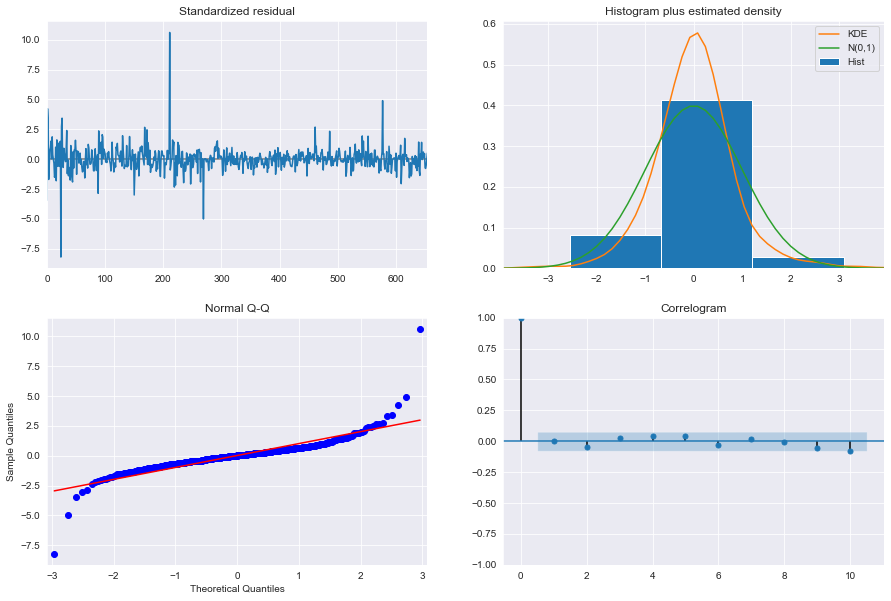

In [259]:
dianostic = model.arima_res_.plot_diagnostics()
dianostic.set_size_inches(15,10)

In [260]:
prediction = model.predict(len(test))

In [261]:
prediction = list(prediction)

In [262]:
prediction

[14.362784358466092,
 14.361065081129496,
 14.423547411538019,
 14.439961437545087,
 14.61217912468734,
 14.641224651777298,
 14.753273288863571,
 14.81636231045177,
 14.98569830152692,
 14.936490240427364,
 14.785494225177564,
 14.822412291539184,
 15.092217071139904,
 15.10080883800631,
 15.142751496849339,
 15.176715997799766,
 15.223311474184452,
 15.394101638435053,
 15.367561328640965,
 15.34813380226686,
 15.391127243484979,
 15.322881464157124,
 15.325836338683724,
 15.272874161500134,
 15.250909382852818,
 15.289002740542252,
 15.33305845751929,
 15.407725232574881,
 15.565416342179212,
 15.666922878694361,
 15.784591155287503,
 15.891540381635906,
 15.955226483200173,
 15.987086321331134,
 15.935866809088347,
 15.935919254293518,
 16.18193600878612,
 16.092921705207473,
 16.149990394424858]

In [263]:
test.head()

,Close
Date,
2019-11-12,14.38
2019-11-13,14.47
2019-11-14,14.37
2019-11-15,13.94
2019-11-18,14.69


In [264]:
predict = pd.DataFrame(prediction,columns=['Predicted'],index=test.index)

In [265]:
predict.head()

,Predicted
Date,
2019-11-12,14.362784
2019-11-13,14.361065
2019-11-14,14.423547
2019-11-15,14.439961
2019-11-18,14.612179


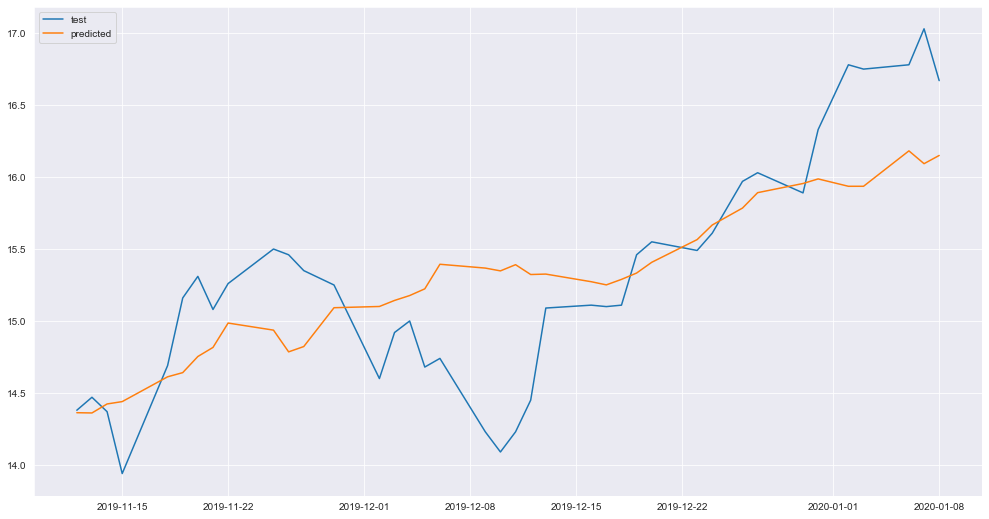

In [266]:
plt.figure(figsize=(17,9))
sea.set_style('darkgrid')
plt.plot(test,label='test')
plt.plot(predict,label='predicted')
plt.legend(loc='best')

In [267]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test,predict)
print("mean square error is:",MSE)

mean square error is: 0.2910648142547863


In [250]:
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs)
    Return a fixed frequency DatetimeIndex.
    
    Parameters
    ----------
    start : str or datetime-like, optional
        Left bound for generating dates.
    end : str or datetime-like, optional
        Right bound for generating dates.
    periods : integer, optional
        Number of periods to generate.
    freq : str or DateOffset, default 'D'
        Frequency strings can have multiples, e.g. '5H'. See
        :ref:`here <timeseries.offset_aliases>` for a list of
        frequency aliases.
    tz : str or tzinfo, optional
        Time zone name for returning localized DatetimeIndex, for example
        'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
        timezone-naive.
    normalize : bool, default False
        Normalize start/end dates to midnight before generating dat

In [251]:
pd.date_range("01/9/2020", periods=10)

DatetimeIndex(['2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18'],
              dtype='datetime64[ns]', freq='D')